In [575]:
%pylab inline
import numdifftools as nd

import torch

Populating the interactive namespace from numpy and matplotlib


### A simple two layer nn

In [76]:
def nn(x):
    r,c =  x.shape
    weights = np.random.randn(c,4)
    res = np.dot(data,weights)
    weight2 =  np.random.randn(4,1)
    res2 =  np.dot(res,weight2)
    return res2.reshape(-1)


\begin{align}
\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\tilde{y}_{i}\right)^{2}
\end{align}

In [550]:
def mse(y,pred):
    return np.sum((y - pred)**2)/y.size

\begin{align}
\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\tilde{y}_{i}\right)^{2}}
\end{align}

In [551]:
def rmse(y,pred):
    return np.sqrt(np.sum((y - pred)**2)/y.size)

In [79]:
data  =  np.random.randn(10,20)
y = np.random.randn(10,)
pred  = nn(data)

In [80]:
mse(y,pred)

76.31538469582368

In [81]:
rmse(y,pred)

8.73586771281615

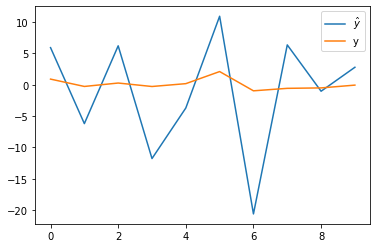

In [82]:
plt.plot(pred,label=r"$\hat{y}$")
plt.plot(y,label="y")
plt.legend()
plt.show()

In [132]:
x  = np.array([3, 5])
ww = np.array([2, 7])
w  = np.array([[2,4],[4,-5]])

In [133]:
w

array([[ 2,  4],
       [ 4, -5]])

In [134]:
ww@np.dot(x,w)

-39

In [135]:
x  = np.array([2, 3])


In [136]:
ww@np.dot(x,w)

-17

In [140]:
def nn(x):
    w  = np.array([[1,-1],[1,1]])
    ww = np.array([2, -1])
    x =  np.tanh(w@x)
    x  =  ww@x
    return x
def relu(x):
    return np.where(x >= 0 ,x,0)

In [138]:
nn(x)

-2.5230975161741247

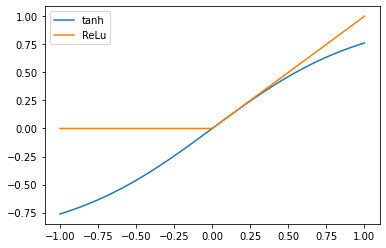

In [149]:
x  =  np.linspace(-1,1,100)

plt.plot(x,np.tanh(x),label="tanh")
plt.plot(x,relu(x),label="ReLu")
plt.legend()

In [168]:
x  = np.array([3, 5])

w1  = np.array([[2,4],[4,-5]])
w2  = np.array([[-1,1],[2,2]])
w3 = np.array([-3, 7])

In [169]:
r1 = relu(w1@x)
r2  = relu(w2@r1)
r3  =  relu(w3@r2)

In [170]:
r3

array(364)

In [171]:
x  = np.array([1, 1])

w1  = np.array([[2,4],[4,-5]])
w2  = np.array([[0,1],[1,1]])
w3 = np.array([5, 1])

In [182]:
r1 = w1@x
r2  = w2@r1
r3  =  w3@r2

In [177]:
r3

0

In [185]:
def resnet(x):
    w1  = np.array([[2,4],[4,-5]])
    w2  = np.array([[0,1],[1,1]])
    w3 = np.array([5, 1])
    r1 = w1@x + x
    r2  = w2@r1 + r1
    r3  =  w3@r2
    return r3

In [210]:
def basenet(x,act):
    c = x.shape[0]
    weights = np.random.randn(c,c)
    res = act(np.dot(x,weights))
    weight2 =  np.random.randn(c,1)
    res2 =  act(np.dot(res,weight2))
    return res2
def i(x):
    return x

In [211]:
basenet(x,relu)

array([0.])

In [230]:
x =  np.array([3,2])
w1  = np.array([[2,1],[0,0]])
w2 = np.array([2.01, 2])
y = 5

yhat =  relu(w2@relu(w1@x))

In [231]:
yhat - y

11.079999999999998

# calculating slopes

In [347]:
w  = np.array([1,2])
x  = np.array([3,4])
lr  = 0.01
epoch  = 100
y = np.array([6])
epsilon = 0.001

In [348]:

err  =  yhat - y
grad =  2*err

In [349]:
def loss(y,yhat):
    return np.sqrt((yhat - y)**2/y.size)

def train(x,y,epoch=50):
    error  = []
    w = np.zeros((2,))
    for e in range(epoch):
        yhat =  relu(w@x)
        w  =  w -  lr * nd.Derivative(f)(yhat,y)
        err = f(y,yhat)
        error.append(err)
    err = np.array(error)
    return w,err

In [350]:
w,err =  train(x,y,epoch)

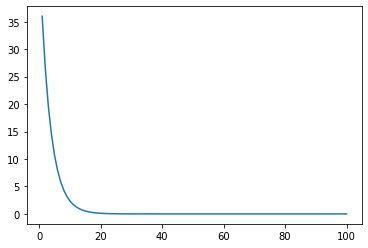

In [360]:
plt.plot(np.arange(1,len(err)+1),err)

In [361]:
w@x

5.999998309573179

## Introduction to backpropagation



In [410]:
x =  np.array([0.5,1])
w1  = np.array([[2,-2],[4,-1]])
w2  = np.array([[0,1],[2,3]])
w3 = np.array([1, 2])
y  = 4

In [411]:
yhat = relu(w3@relu(w2@relu(w1@x)))

In [412]:
yhat

array(7.)

In [414]:
w1
yy = np.zeros(2)

In [437]:
for i in range(len(yy)):
    temp = 0
    for k in range(w1.shape[0]):
        temp = w1[i,k] * x[i]
    yy[i] =  temp

In [438]:
yy

array([-1., -1.])

# Cross-entropy loss
\begin{align}
\mathrm{CE}= - \sum_{i=0}^{n} y_{i}  \log{\tilde{y}_{i}}
\end{align}

In [481]:
def cross_entropy(y,yhat):
    return -np.sum(y * -np.log(y_hat))

#  Softmax
\begin{align}
\mathrm{SoftMax(x)_i}= \frac{e^{s_i}}{\sum_{j=0}^{n} e^{s_j}}
\end{align}

In [453]:
def softmax(x):
    return x/x.sum()

In [648]:
x =  np.random.randint(13,100,5)

In [649]:
y_hat = softmax(x)
y =  np.zeros(5)
y[0] = 1

In [650]:
cross_entropy(y,y_hat)

-1.3574739225843988

In [480]:
def nn(x):
    r,c =  x.shape
    weights = np.random.randn(c,4)
    res = np.dot(data,weights)
    weight2 =  np.random.randn(4,1)
    res2 =  np.dot(res,weight2)
    return res2.reshape(-1)

array([0.24203822, 0.17197452, 0.28980892, 0.23566879, 0.06050955])

In [524]:
def cal_gen(N):
    Nr =  np.int(N*0.20)
    N =  N -  Nr
    x_train = []
    y_train = []
#     np.random.normal(0,0.64,10)  <-- to generate from a normal distribution with mu=0,sigma=0.64
    for _ in range(Nr):
    #     for children with disease
        x_train.append(np.random.randint(13,63,10))
        y_train.append(1)
        #     for children with disease
        x_train.append(np.random.randint(64,100,10))
        y_train.append(0)


    for _ in range(N):
    #     for children with disease
        x_train.append(np.random.randint(13,63,10))
        y_train.append(0)
        #     for children with disease
        x_train.append(np.random.randint(64,100,10))
        y_train.append(1)
    return np.array(x_train),np.array(y_train)

def reg_gen(N):
    Nr =  np.int(N*0.20)
    N =  N -  Nr
    x_train = []
    y_train = []
    for _ in range(Nr):
    #     for children with disease
        x_train.append(np.random.randint(13,63,10))
        y_train.append(np.random.randint(1,54,1))
        #     for children with disease
        x_train.append(np.random.randint(64,100,10))
        y_train.append(np.random.randint(55,100,1))


    for _ in range(N):
    #     for children with disease
        x_train.append(np.random.randint(13,63,10))
        y_train.append(np.random.randint(55,100,1))
        #     for children with disease
        x_train.append(np.random.randint(64,100,10))
        y_train.append(np.random.randint(1,54,1))
    return np.array(x_train),np.array(y_train)


def data_faker(N=500,r=True):
    if(r):
        x_train,y_train = reg_gen(N)
        x_test,y_test = reg_gen(np.int(N*0.20))
        return (x_train,y_train,x_test,y_test)
    else:
        x_train,y_train = cal_gen(N)
        x_test,y_test = reg_gen(np.int(N*0.20))
        return (x_train,y_train,x_test,y_test)

In [525]:
x_train,y_train,x_test,y_test = data_faker(500)

In [494]:
x_train = []
y_train = []


for _ in range(50):
#     for children with disease
    x_train.append(np.random.randint(13,63,10))
    y_train.append(1)
    #     for children with disease
    x_train.append(np.random.randint(64,100,10))
    y_train.append(0)
    

for _ in range(100):
#     for children with disease
    x_train.append(np.random.randint(13,63,10))
    y_train.append(0)
    #     for children with disease
    x_train.append(np.random.randint(64,100,10))
    y_train.append(1)

In [497]:
x_train = np.array(x_train)
y_train = np.array(y_train)

(300, 10)

In [531]:
x_train[0].shape

(10,)

In [556]:
def relu(x):
    return np.where(x>0 ,x, 0)

In [558]:
def nn(x):
    w1 = np.random.normal(0,1,(10,16))
    w2 = np.random.normal(0,1,(16,32))
    w3  = np.random.normal(0,1,(32,1))
    r = relu(x@w1)
    r2  =  relu(r@w2)
    r3  =  r2@w3
    return r3

In [616]:
def mse(y,pred):
    return np.sum((y - pred)**2)/len(y)

def f(y,ypred):
    return np.sum((y - ypred)**2)/len(y)

def train(x,y,f,epoch=50):
    error  = []
    w1 = np.random.normal(0,1,(10,16))
    w2 = np.random.normal(0,1,(16,32))
    w3  = np.random.normal(0,1,(32,1))
    w = []
    for e in range(epoch):
        for i in range(len(y)):
                    r1  = x[i]@w1
                    r2 = r1@w2
                    r3  =  r2@w3
                    w1  =  w1 -  lr * nd.Derivative(f)(r3,y[i])
                    w2  =  w2 -  lr * nd.Derivative(f)(r3,y[i])
                    w3  =  w3 -  lr * nd.Derivative(f)(r3,y[i])
        err = f(y,yhat)
        error.append(err)
    err = np.array(error)
    return w1,w2,w3,err

In [617]:
w1,w2,w3,err = train(x_train,y_train,f,epoch=50)

In [621]:
r1  = x_test@w1
r2 = r1@w2
yhat  =  r2@w3


In [642]:
er = f(y_test,yhat)

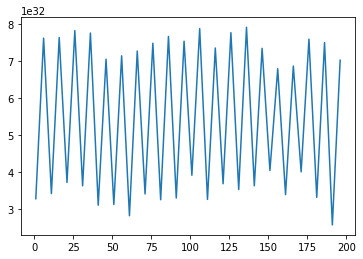

In [638]:
t  =  np.arange(1,201,1)
plt.plot(t[::5],yhat[::5],label="y")

plt.show()

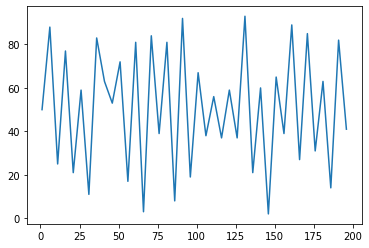

In [637]:
plt.plot(t[::5],y_test[::5])

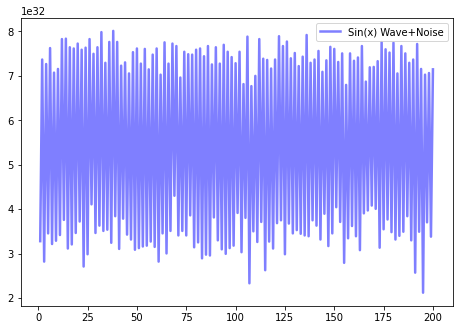

In [704]:
fig= plt.figure()

axes= fig.add_axes([0,0,1,1])
l_bound  =  yhat -  er
u_bound  =  yhat + er
axes.plot(t,yhat, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x) Wave+Noise")
# axes.fill_between(t, l_bound, u_bound,color="green",alpha=0.1)
plt.legend()
plt.show()

In [698]:
x  =  np.linspace(-100,100,100)